In [185]:
import numpy as np;
import matplotlib.pyplot as plt;
%matplotlib inline


#pTet:LacI-GFP
#pLac:TetR-RFP
#rows = ['A','B','C','D','E','F','G','H'];
IPTG_conc = [1000,500,250,125,62.5,31.25,31.25/2.0,31.25/4.0];

start_conc = 100e-9/462e-3*1e9 #nM
atc_conc = [];
for ind in range(0,9):
    atc_conc.append(start_conc/np.power(2.0,ind));
    
#cols = [1,2,3,4,5,6,7,8];
#IPTG_dict = dict();
#atc_dict = dict();
design_temp = '39'

In [186]:
import csv
with open('DARPA-SD2-support/vnat toggle/gfp_' + design_temp+'.csv', 'rb') as csvfile:
    creader = csv.reader(csvfile, delimiter=',', quotechar='|')
    time_array = [];
    for row in creader:
        row[0] = row[0].strip('\xef\xbb\xbf');
        try:
            [np.float32(elem) for elem in row]
        except ValueError,e:
            print row
        if 'OVRFLW' in row:
            break;
        else:
            time_array.append(row);
    gfp_data_array = np.asarray(time_array,dtype=np.float32);

with open('DARPA-SD2-support/vnat toggle/rfp_' + design_temp+'.csv', 'rb') as csvfile:
    creader = csv.reader(csvfile, delimiter=',', quotechar='|')
    time_array = [];
    for row in creader:
        row[0] = row[0].strip('\xef\xbb\xbf');
        try:
            [np.float32(elem) for elem in row]
        except ValueError,e:
            print row
        if 'OVRFLW' in row:
            break;
        else:
            time_array.append(row);
    rfp_data_array = np.asarray(time_array,dtype=np.float32);
    
with open('DARPA-SD2-support/vnat toggle/od_' + design_temp+'.csv', 'rb') as csvfile:
    creader = csv.reader(csvfile, delimiter=',', quotechar='|')
    time_array = [];
    for row in creader:
        row[0] = row[0].strip('\xef\xbb\xbf');
        try:
            [np.float32(elem) for elem in row]
        except ValueError,e:
            print row
        if 'OVRFLW' in row:
            break;
        else:
            time_array.append(row);
    od_data_array = np.asarray(time_array,dtype=np.float32);
    
        

['4724', '51370', '61295', '64579', '71468', '79698', '91092', '94877', '18', '563', '10', '12', '80589', '99907', '99907', 'OVRFLW', 'OVRFLW', 'OVRFLW', '98330', '95211', '15', '529', '14', '16', '92823', 'OVRFLW', '99447', '99807', '99273', '98833', '96557', '92220', '22', '516', '20', '11', '94720', 'OVRFLW', '99237', '99260', '98792', '97539', '95339', '90721', '15', '16', '14', '12', '88474', '99968', '97176', '98270', '96661', '96908', '94143', '90575', '18', '23', '17', '12', '67812', '96357', '96514', '96643', '96550', '95401', '92092', '88828', '15', '15', '17', '12', '24095', '71592', '77792', '81312', '81010', '81306', '77764', '75510', '15', '19', '16', '10', '605', '861', '3824', '9734', '11653', '11408', '11717', '13880', '12', '11', '12', '6']


In [187]:
gfp_nc = [0,9,9+12,9+24];
nc = [8,9,10];

In [188]:
gfp_data_array = gfp_data_array[0:rfp_data_array.shape[0],:]
od_data_array = od_data_array[0:rfp_data_array.shape[0],:]

t = np.arange(0,od_data_array.shape[0])*10.0/60.0;

In [189]:
gfp_bgs_data_array = gfp_data_array-gfp_data_array;
rfp_bgs_data_array = rfp_data_array-rfp_data_array;

for col_ind in range(0,gfp_data_array.shape[1]):
    #print np.mean(gfp_data_array[:,nc],axis=1);
    for time_ind in range(0,gfp_data_array.shape[0]):
        mean_gfp_nc = np.mean(gfp_data_array[time_ind,gfp_nc]);

            
        gfp_bgs_data_array[time_ind,col_ind] = np.max( [gfp_data_array[time_ind,col_ind]-mean_gfp_nc,0.0])/od_data_array[time_ind,col_ind];
        mean_rfp_nc = np.mean(rfp_data_array[time_ind,nc]);
        rfp_bgs_data_array[time_ind,col_ind] = np.max([rfp_data_array[time_ind,col_ind]-mean_rfp_nc,0.0])/od_data_array[time_ind,col_ind];

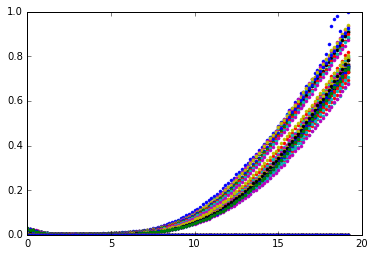

In [190]:
max_hor = 225;
init_hor = 0;
final_gfp =np.zeros((gfp_bgs_data_array.shape[0],64));# gfp_bgs_data_array - gfp_bgs_data_array;
final_rfp =np.zeros((rfp_bgs_data_array.shape[0],64));# gfp_bgs_data_array - gfp_bgs_data_array;
iter = 0;
for col_ind in range(0,final_gfp.shape[1]):
    if col_ind%12 < 8:
        #print col_ind
        final_gfp[:,iter] = gfp_bgs_data_array[:,col_ind]
        final_rfp[:,iter] = rfp_bgs_data_array[:,col_ind]
        iter = iter+1;
final_gfp = (final_gfp-np.min(final_gfp[init_hor:max_hor,:]))/np.max(final_gfp[init_hor:max_hor,:]-np.min(final_gfp[init_hor:max_hor,:]));
final_rfp = (final_rfp-np.min(final_rfp[init_hor:max_hor,:]))/np.max(final_rfp[init_hor:max_hor,:]-np.min(final_gfp[init_hor:max_hor,:]));
plt.plot(t[init_hor:max_hor],final_rfp[init_hor:max_hor,:],'.')

(0.0, 1.0)

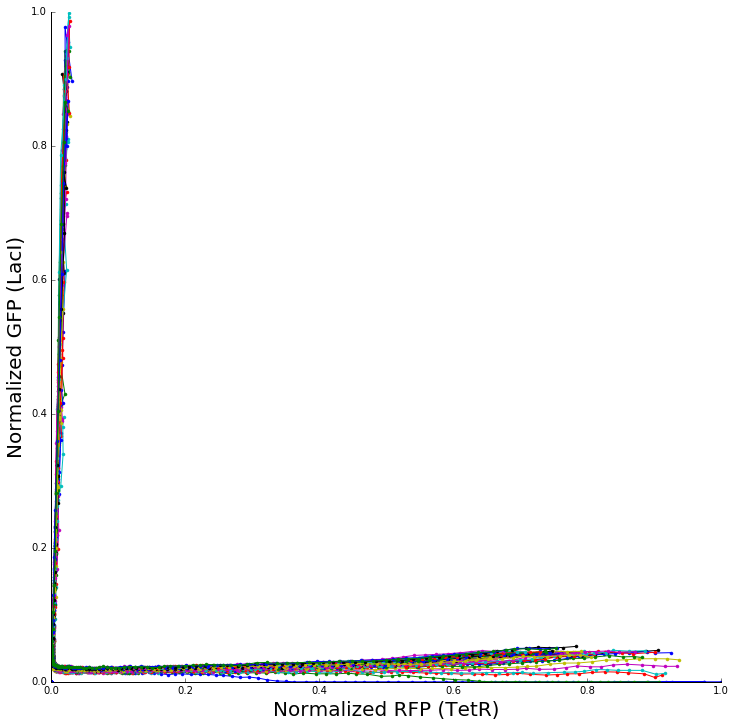

In [191]:

import scipy.signal as signal;

plt.figure(figsize=(12,12))
for ind in range(0,final_gfp.shape[1]):
    gfp_sm = signal.savgol_filter(final_gfp[init_hor:max_hor,ind],window_length=9,polyorder=7);
    rfp_sm = signal.savgol_filter(final_rfp[init_hor:max_hor,ind],window_length=9,polyorder=7);
    plt.plot(rfp_sm,gfp_sm,'.-');   
    plt.xlabel('Normalized RFP (TetR)',size=20);
    plt.ylabel('Normalized GFP (LacI)',size=20);

ax = plt.gca();
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_ylim([0.0,1.0])
ax.set_xlim([0.0,1.0])